In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import csv
import numpy as np
import os,sys
import PIL # for reading tif images
import h5py
import datetime as dt
import time

results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"

sys.path.append("..\\")
from h5_data_utilities import * # helper functions for dealing with h5 files

## 2024.05.17 comparing optimizer values over time

In [87]:
fnames = get_files_by_criteria(date_filters=["2024-04","2024-05"], # only find files from these date directories
                               name_filters=["MLOOP"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # only return the name of the file, not the full path
                               print_filenames=True
)

print(f"found {len(fnames)} files")

found 52 files


In [88]:
setpoint1 = []
setpoint2 = []
setpoint3 = []
setpoint4 = []
setpoint5 = []
setpoint6 = []
AZbottom = []
AZtop = []
AX = []
AY = []
best_cost = []
rid = []

for fname in fnames:

    ds = h5py.File(os.path.join(results, fname))['datasets']
    mincost = min(ds['cost'][()])
    if mincost < 0:
        best_cost.append(mincost)
    
        ds = h5py.File(os.path.join(results, fname))['archive']
        AZbottom.append(ds['AZ_bottom_volts_MOT'][()])
        AZtop.append(ds['AZ_top_volts_MOT'][()])
        AX.append(ds['AX_volts_MOT'][()])
        AY.append(ds['AY_volts_MOT'][()])
    
        setpoint1.append(ds['set_point_PD1_AOM_A1'][()])
        setpoint2.append(ds['set_point_PD2_AOM_A2'][()])
        setpoint3.append(ds['set_point_PD3_AOM_A3'][()])
        setpoint4.append(ds['set_point_PD4_AOM_A4'][()])
        setpoint5.append(ds['set_point_PD5_AOM_A5'][()])
        setpoint6.append(ds['set_point_PD6_AOM_A6'][()])
    
        rid.append(h5py.File(os.path.join(results, fname))['rid'][()])

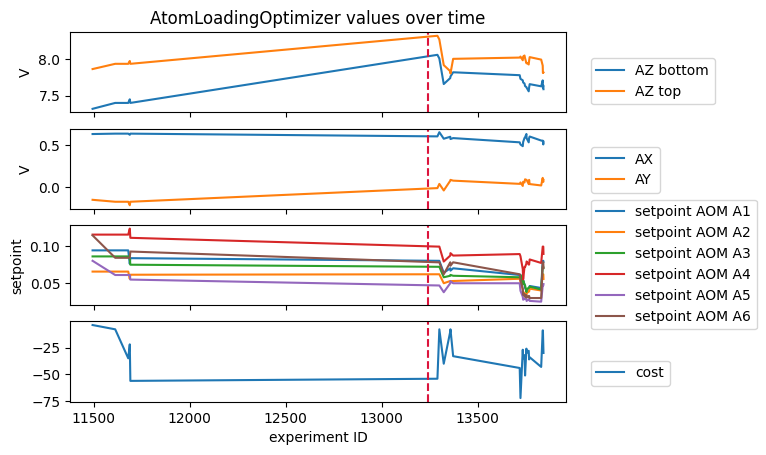

In [89]:
fig,axes = plt.subplots(nrows=4, sharex=True)
ax,ax2,ax3,ax4 = axes

ax.set_title("AtomLoadingOptimizer values over time")
ax.plot(rid, AZbottom, label='AZ bottom')
ax.plot(rid, AZtop, label='AZ top')
ax2.plot(rid, AX, label='AX')
ax2.plot(rid, AY, label='AY')
ax.set_ylabel("V")
ax2.set_ylabel("V")

ax3.plot(rid, setpoint1, label='setpoint AOM A1')
ax3.plot(rid, setpoint2, label='setpoint AOM A2')
ax3.plot(rid, setpoint3, label='setpoint AOM A3')
ax3.plot(rid, setpoint4, label='setpoint AOM A4')
ax3.plot(rid, setpoint5, label='setpoint AOM A5')
ax3.plot(rid, setpoint6, label='setpoint AOM A6')

ax3.set_ylabel("setpoint")

ax4.plot(rid, best_cost, label='cost')
ax4.set_xlabel('experiment ID')
for fudge,ax in zip([0.1,0.2,-0.3,0.2],axes):
    ax.legend(loc=(1.05,fudge))
    ax.axvline(13241,ls='--',color='crimson')
plt.show()

In [37]:
ds = h5py.File(os.path.join(results, fnames[0]))['datasets']

In [40]:
ds['AZ_bottom_volts_MOT'][()]

8.005520751953124

## 2024.05.10 - 17
I lost atom loading after experiment 13241 and I think it was programmatic, but reverting to the main branch which I tested yesterday doesn't bring loading back. So it could be a dataset that got updated in a way that has crippled something.

We were able to recover atom loading after a few fixes to the ARTIQ code, as the coils were not always turning on, but also there must have been some real change in the lab, as the coil settings from 5/08 do not give any atom loading. To get atom loading, the Y coil has to change sign and magnitude, corresponding to a change of about 100 mG. along that direction. The other coil values found by MLOOP are similar to those used previously to within 3%.

In [5]:
fnames = get_files_by_criteria(date_filters=["2024-05-10"], # only find files from these date directories
                               name_filters=["GeneralVariableScan"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # only return the name of the file, not the full path
                               print_filenames=True
)

only_show_i_greater_than = -1
# only_show_i_greater_than = 18

print(f"found {len(fnames)} files")
for i,f in enumerate(fnames):
    if i > only_show_i_greater_than:
        try:
            ds = h5py.File(os.path.join(results, f))['datasets']
            scan_str = str_from_h5(ds['scan_variable1_name'])
            if str_from_h5(ds['scan_variable2_name']) != '':
                scan_str += ", " +str_from_h5(ds['scan_variable2_name'])
            print(f"file {i} ({f}) scanned over "+scan_str)
        except:
            print(f"oops... something wrong with {f}")

found 33 files
file 0 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013226-GeneralVariableScan.h5) scanned over dummy_variable
file 1 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013227-GeneralVariableScan.h5) scanned over dummy_variable
file 2 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013231-GeneralVariableScan.h5) scanned over dummy_variable
file 3 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013233-GeneralVariableScan.h5) scanned over dummy_variable
file 4 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013233-GeneralVariableScan_atom_loading_scan_over_dummy_variable.h5) scanned over dummy_variable
file 5 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013235-GeneralVariableScan.h5) scanned over dummy_variable
file 6 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-05-10\07\000013235-Gener

In [4]:
i = 10 # 100% retention and 40% loading. right after this was run I lost loading. seems to be programmatic not a lab issue

f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
print_h5_archive_and_datasets(f, scalars_only=True, quiet=True)

AOM_A1_freq = 78480000.0
AOM_A2_freq = 78490000.0
AOM_A3_freq = 78500000.0
AOM_A4_freq = 78510000.0
AOM_A5_freq = 78520000.0
AOM_A6_freq = 78530000.0
AX_volts_MOT = 0.536
AX_volts_MOT_MOT_phase2 = 0.419
AX_volts_MOT_phase2 = 0.429833740234375
AX_volts_OP = 0.15798914968578714
AX_volts_PGC = -0.113
AX_volts_RO = -0.1132077008299555
AX_volts_blowaway = -0.1750847566673611
AX_volts_microwave = 0.0
AY_volts_MOT = -0.105
AY_volts_MOT_MOT_phase2 = 0.255
AY_volts_MOT_phase2 = 0.254542236328125
AY_volts_OP = -1.403292196481423
AY_volts_PGC = 0.5
AY_volts_RO = 0.5
AY_volts_blowaway = -0.1323212924218066
AY_volts_microwave = 0.0
AZ_bottom_volts_MOT = 7.503
AZ_bottom_volts_MOT_phase2 = 4.88379296875
AZ_bottom_volts_OP = 0.00589264863183836
AZ_bottom_volts_PGC = -0.5
AZ_bottom_volts_RO = -0.5
AZ_bottom_volts_blowaway = -0.03565564422059686
AZ_bottom_volts_microwave = 0.0
AZ_top_volts_MOT = 7.957
AZ_top_volts_MOT_MOT_phase2 = 5.405
AZ_top_volts_MOT_phase2 = 5.418275146484375
AZ_top_volts_OP = -0.09

In [13]:
# compare dictionaries of the datasets to see what has changed

file1_dict = {}
f = h5py.File(os.path.join(results, fnames[10]))
rid1 = f['rid'][()]
print(rid1)
h5_archive_and_datasets_to_locals(f, parent_locals=file1_dict, quiet=True)

file2_dict = {}
f = h5py.File(os.path.join(results, fnames[11]))
rid2 = f['rid'][()]
print(rid2)
h5_archive_and_datasets_to_locals(f, parent_locals=file2_dict, quiet=True)

13241
13242


In [14]:
for (key1,val1),(key2,val2) in zip(file1_dict.items(), file2_dict.items()):
    assert key1 == key2, "dicts are different, you should use nested for loops"
    try: # ignore non-scalar values
        len(val1)
        len(val2) 
    except Exception as e:
        if val1 != val2:
            print(f"{key1}={val1} in {rid1}, but {key2}={val2} in {rid2}")

p_AOM_A1=-11.902716225723351 in 13241, but p_AOM_A1=-13.217721643794444 in 13242
p_AOM_A2=-12.125062864743779 in 13241, but p_AOM_A2=-13.526148219692695 in 13242
p_AOM_A3=-12.962068374280493 in 13241, but p_AOM_A3=-14.10980022502363 in 13242
p_AOM_A4=-6.291084132466005 in 13241, but p_AOM_A4=-8.254386182301179 in 13242
p_AOM_A5=-14.33242748328377 in 13241, but p_AOM_A5=-14.70586304582537 in 13242
p_AOM_A6=-9.968905634416757 in 13241, but p_AOM_A6=-5.769490242670492 in 13242
p_FORT_default=-5.7008224615898095 in 13241, but p_FORT_default=-5.697429804462515 in 13242


In [15]:
# compare dictionaries of the datasets to see what has changed

file1_dict = {}
f = h5py.File(os.path.join(results, fnames[10]))
rid1 = f['rid'][()]
print(rid1)
h5_archive_and_datasets_to_locals(f, parent_locals=file1_dict, quiet=True)

file2_dict = {}
file2 = "2024-05-08\\20\\000013181-GeneralVariableScan_single_photon_scan_over_dummy_variable.h5"
f = h5py.File(os.path.join(results, file2))
rid2 = f['rid'][()]
print(rid2)
h5_archive_and_datasets_to_locals(f, parent_locals=file2_dict, quiet=True)

13241
13181


In [18]:
for key1,val1 in file1_dict.items():
    for key2,val2 in file2_dict.items():
        if key1 == key2:
            try: # ignore non-scalar values
                len(val1)
                len(val2)
            except Exception as e:
                if val1 != val2:
                    print(f"{key1}={val1} in {rid1}, but {key2}={val2} in {rid2}")

dummy_variable=0.5 in 13241, but dummy_variable=0.0 in 13181
p_AOM_A1=-11.902716225723351 in 13241, but p_AOM_A1=-12.285569369127307 in 13181
p_AOM_A2=-12.125062864743779 in 13241, but p_AOM_A2=-13.01637929612034 in 13181
p_AOM_A3=-12.962068374280493 in 13241, but p_AOM_A3=-13.450642720664918 in 13181
p_AOM_A4=-6.291084132466005 in 13241, but p_AOM_A4=-7.77324488718369 in 13181
p_AOM_A5=-14.33242748328377 in 13241, but p_AOM_A5=-14.667750188838422 in 13181
p_AOM_A6=-9.968905634416757 in 13241, but p_AOM_A6=-10.472810242601636 in 13181
p_FORT_loading=1.15 in 13241, but p_FORT_loading=-4.096694222146602 in 13181
set_point_FORT_MM=0.226 in 13241, but set_point_FORT_MM=0.3 in 13181
iteration=0 in 13241, but iteration=1 in 13181
n_measurements=100 in 13241, but n_measurements=1000 in 13181


In [21]:
# compare dictionaries of the datasets to see what has changed

file1_dict = {}
file1 = "2024-05-14\\21\\000013723-GeneralVariableScan.h5"
f = h5py.File(os.path.join(results, file1))
rid1 = f['rid'][()]
print(rid1)
h5_archive_and_datasets_to_locals(f, parent_locals=file1_dict, quiet=True)

file2_dict = {}
file2 = "2024-05-14\\21\\000013724-AtomLoadingOptimizerMLOOP.h5"
f = h5py.File(os.path.join(results, file2))
rid2 = f['rid'][()]
print(rid2)
h5_archive_and_datasets_to_locals(f, parent_locals=file2_dict, quiet=True)

for key1,val1 in file1_dict.items():
    for key2,val2 in file2_dict.items():
        if key1 == key2:
            try: # ignore non-scalar values
                len(val1)
                len(val2)
            except Exception as e:
                if val1 != val2:
                    print(f"{key1}={val1} in {rid1}, but {key2}={val2} in {rid2}")

13723
13724
AX_volts_MOT=0.5066915400384276 in 13723, but AX_volts_MOT=0.48606727735849786 in 13724
AY_volts_MOT=0.05368892024920639 in 13723, but AY_volts_MOT=0.012102075379339942 in 13724
AZ_bottom_volts_MOT=7.729 in 13723, but AZ_bottom_volts_MOT=7.709554045051685 in 13724
AZ_top_volts_MOT=8.031485609021951 in 13723, but AZ_top_volts_MOT=7.981485609021951 in 13724
dummy_variable=checking atom loading in 13723, but dummy_variable=0.0 in 13724
n_measurements=100 in 13723, but n_measurements=400 in 13724
p_AOM_A1=-13.032236180046972 in 13723, but p_AOM_A1=-14.180721396602456 in 13724
p_AOM_A2=-13.566239356662315 in 13723, but p_AOM_A2=-13.384848187103096 in 13724
p_AOM_A3=-13.80532439949465 in 13723, but p_AOM_A3=-13.703462902990404 in 13724
p_AOM_A4=-6.584681261090246 in 13723, but p_AOM_A4=-5.942463521319934 in 13724
p_AOM_A5=-14.483773181355906 in 13723, but p_AOM_A5=-14.423528927353795 in 13724
p_AOM_A6=-8.747480799876723 in 13723, but p_AOM_A6=-10.298785007738092 in 13724
p_FORT_l

In [23]:
# compare dictionaries of the datasets to see what has changed

file1_dict = {}
file1 = "2024-05-15\\13\\000013756-AtomLoadingOptimizerMLOOP.h5"
f = h5py.File(os.path.join(results, file1))
rid1 = f['rid'][()]
print(rid1)
h5_archive_and_datasets_to_locals(f, parent_locals=file1_dict, quiet=True)

file2_dict = {}
file2 = "2024-05-15\\14\\000013757-ExperimentVariables.h5"
f = h5py.File(os.path.join(results, file2))
rid2 = f['rid'][()]
print(rid2)
h5_archive_and_datasets_to_locals(f, parent_locals=file2_dict, quiet=True)

for key1,val1 in file1_dict.items():
    for key2,val2 in file2_dict.items():
        if key1 == key2:
            try: # ignore non-scalar values
                len(val1)
                len(val2)
            except Exception as e:
                if val1 != val2:
                    print(f"{key1}={val1} in {rid1}, but {key2}={val2} in {rid2}")

13756
13757
p_AOM_A1=-14.853446691886045 in 13756, but p_AOM_A1=-13.468558970389335 in 13757
p_AOM_A2=-15.241859551582477 in 13756, but p_AOM_A2=-13.734695627627564 in 13757
p_AOM_A3=-17.007025355688548 in 13756, but p_AOM_A3=-14.368899994169162 in 13757
p_AOM_A4=-7.188554571776158 in 13756, but p_AOM_A4=-9.00281397345401 in 13757
p_AOM_A5=-16.807708812991756 in 13756, but p_AOM_A5=-15.46530085735327 in 13757
p_AOM_A6=-12.264179274923555 in 13756, but p_AOM_A6=-10.946480235218337 in 13757
p_FORT_loading=-8.268503427426129 in 13756, but p_FORT_loading=-5.78150459545379 in 13757
set_point_PD6_AOM_A6=0.03251984511223413 in 13756, but set_point_PD6_AOM_A6=0.034141356749540316 in 13757
n_measurements=400 in 13756, but n_measurements=1000 in 13757


In [33]:
# compare MOT setpoints last week to this week after getting the atom loading back

file1_dict = {}
# file1 = "2024-05-15\\13\\000013756-AtomLoadingOptimizerMLOOP.h5"
file1 = "2024-05-08\\20\\000013181-GeneralVariableScan.h5"
f = h5py.File(os.path.join(results, file1))
rid1 = f['rid'][()]
print(rid1)
h5_archive_and_datasets_to_locals(f, parent_locals=file1_dict, quiet=True)

file2_dict = {}
# file2 = "2024-05-15\\14\\000013757-ExperimentVariables.h5"
file2 = "2024-05-17\\09\\000013835-ExperimentVariables.h5"
f = h5py.File(os.path.join(results, file2))
rid2 = f['rid'][()]
print(rid2)
h5_archive_and_datasets_to_locals(f, parent_locals=file2_dict, quiet=True)

print("this week/last week")
for i in range(1,7):
    new_over_old = file2_dict[f"set_point_PD{i}_AOM_A{i}"]/file1_dict[f"set_point_PD{i}_AOM_A{i}"]
    print(f"setpoint AOM A{i} new/old", new_over_old)

print("\nthis week/last week")
print(file2_dict["AZ_bottom_volts_MOT"]/file1_dict["AZ_bottom_volts_MOT"])
print(file2_dict["AZ_top_volts_MOT"]/file1_dict["AZ_top_volts_MOT"])
print(file2_dict["AX_volts_MOT"]/file1_dict["AX_volts_MOT"])
print(file2_dict["AY_volts_MOT"]/file1_dict["AY_volts_MOT"])

13181
13835
this week/last week
setpoint AOM A1 new/old 0.5458126588387556
setpoint AOM A2 new/old 0.6503251745951265
setpoint AOM A3 new/old 0.5779679429466442
setpoint AOM A4 new/old 0.7789740055657132
setpoint AOM A5 new/old 0.5397914885836003
setpoint AOM A6 new/old 0.38790658474098716

this week/last week
1.0166650996959774
1.0042231684130267
1.0321648470308251
-0.16996705144514287


In [31]:
0.1*0.23*2.16

0.04968000000000001

In [29]:
for i in range(1,7):
    new_over_old = file2_dict[f"set_point_PD{i}_AOM_A{i}"]
    print(f"old setpoint AOM A{i}", file1_dict[f"set_point_PD{i}_AOM_A{i}"])

old setpoint AOM A1 0.08
old setpoint AOM A2 0.062
old setpoint AOM A3 0.072
old setpoint AOM A4 0.099
old setpoint AOM A5 0.04706573936146263
old setpoint AOM A6 0.078
